In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

**Data Extraction and Set Up**

In [137]:
train = pd.read_csv('sfo_weather_train.csv')
test = pd.read_csv('sfo_weather_test.csv')

In [138]:
train

,Precip,Air_Temp_Max,Air_Temp_Min,DayOfWeek,Operating_Airline,Dest,DestState,DepDelay,DepDel15,DepTimeBlk,Distance,DistanceGroup,DepDelayBinary
0,0.12,57,44,7,AS,SEA,WA,-15.0,0.0,2100-2159,679.0,3,0
1,0.00,69,53,7,UA,LAS,NV,-5.0,0.0,1900-1959,414.0,2,0
2,0.00,68,53,2,UA,SNA,CA,-4.0,0.0,1000-1059,372.0,2,0
3,0.12,57,45,5,DL,SLC,UT,-8.0,0.0,1000-1059,599.0,3,0
4,0.06,65,50,3,AS,LAS,NV,-5.0,0.0,1700-1759,414.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51525,0.03,67,51,3,UA,PDX,OR,-9.0,0.0,1900-1959,550.0,3,0
51526,0.00,73,55,5,QX,SEA,WA,-9.0,0.0,0600-0659,679.0,3,0
51527,0.01,70,54,3,WN,SAN,CA,95.0,1.0,2000-2059,447.0,2,1
51528,0.10,56,44,7,UA,SNA,CA,15.0,1.0,1900-1959,372.0,2,1


In [139]:
test

,Precip,Air_Temp_Max,Air_Temp_Min,DayOfWeek,Operating_Airline,Dest,DestState,DepDelay,DepDel15,DepTimeBlk,Distance,DistanceGroup,DepDelayBinary
0,0.03,68,51,6,OO,LAX,CA,-4.0,0.0,1000-1059,337.0,2,0
1,0.07,64,48,5,WN,LAS,NV,5.0,0.0,1700-1759,414.0,2,1
2,0.00,72,55,2,AA,DFW,TX,-10.0,0.0,1800-1859,1464.0,6,0
3,0.01,67,51,5,UA,EUG,OR,-7.0,0.0,2300-2359,451.0,2,0
4,0.09,56,45,5,OO,SLC,UT,16.0,1.0,0900-0959,599.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22080,0.11,62,48,3,UA,OGG,HI,-3.0,0.0,1100-1159,2338.0,10,0
22081,0.17,58,46,1,OO,EUG,OR,6.0,0.0,1600-1659,451.0,2,1
22082,0.01,69,52,4,AA,PHX,AZ,3.0,0.0,1200-1259,651.0,3,1
22083,0.00,72,54,5,UA,SAN,CA,144.0,1.0,2200-2259,447.0,2,1


In [140]:
X_train = train.drop(columns=['DepDelay', 'DepDel15', 'DepDelayBinary'])
X_test = test.drop(columns=['DepDelay', 'DepDel15', 'DepDelayBinary'])

y_train_reg = train.loc[:, 'DepDelay']
y_train_class = train.loc[:, 'DepDelayBinary']
y_train_delay15 = train.loc[:, 'DepDel15']

y_test_reg = test.loc[:, 'DepDelay']
y_test_class = test.loc[:, 'DepDelayBinary']
y_test_delay15 = test.loc[:, 'DepDel15']

In [141]:
columns = list(test.columns)
columns

['Precip',
 'Air_Temp_Max',
 'Air_Temp_Min',
 'DayOfWeek',
 'Operating_Airline',
 'Dest',
 'DestState',
 'DepDelay',
 'DepDel15',
 'DepTimeBlk',
 'Distance',
 'DistanceGroup',
 'DepDelayBinary']

In [142]:
logmodeldepdelay = smf.logit(formula = 'DepDelayBinary ~ Precip + Air_Temp_Max + Air_Temp_Min + DayOfWeek + Operating_Airline + Dest + DestState + DepTimeBlk + Distance + DistanceGroup',
                     data = train).fit()

print(logmodeldepdelay.summary())

         Current function value: 0.618623
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         DepDelayBinary   No. Observations:                51530
Model:                          Logit   Df Residuals:                    51416
Method:                           MLE   Df Model:                          113
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                 0.05565
Time:                        19:41:51   Log-Likelihood:                -31878.
converged:                      False   LL-Null:                       -33756.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.7977   1.18e+05  -4.06e-05      1.000   -2.32e+05    2.32e+05
Operating_Airline[T.AS]   

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [143]:
logmodeldepdelay15 = smf.logit(formula = 'DepDel15 ~ Precip + Air_Temp_Max + Air_Temp_Min + DayOfWeek + Operating_Airline + Dest + DestState + DepTimeBlk + Distance + DistanceGroup',
                     data = train).fit()

print(logmodeldepdelay15.summary())

         Current function value: 0.447814
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               DepDel15   No. Observations:                51530
Model:                          Logit   Df Residuals:                    51416
Method:                           MLE   Df Model:                          113
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                 0.03137
Time:                        19:41:54   Log-Likelihood:                -23076.
converged:                      False   LL-Null:                       -23823.
Covariance Type:            nonrobust   LLR p-value:                9.573e-240
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.9054   9.35e+04  -4.18e-05      1.000   -1.83e+05    1.83e+05
Operating_Airline[T.AS]   

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Baseline Classification Model for DepDelay**

In [144]:
delay_false = np.sum(train['DepDelayBinary'] == 0)  # not delayed 
delay_true = np.sum(train['DepDelayBinary'] == 1)   # delayed

print(pd.Series({'0': delay_false, '1': delay_true}))

0    32829
1    18701
dtype: int64


In [145]:
ACC = delay_false/(delay_false + delay_true) 
print('ACC:', ACC)

ACC: 0.6370851930914031


In [146]:
TPR = 0                        # TPR = TP/P = TP/(TP+FN)
FPR = 0                        # FPR = FP/N = FP/(FP+TN)
print(TPR,FPR)

0 0


In [147]:
TNR = 1                       # TNR = TN/N = TN/(TN+FP)
FNR = 1                       # FNR = FN/P = FN/(TP+FN)
print(TNR,FNR)

1 1


**Logistic Regression Classification Model for DepDelay**

In [148]:
#y_test = test['DepDelayBinary']
y_prob = logmodeldepdelay.predict(X_test)
y_prob

0        0.334983
1        0.533725
2        0.354292
3        0.476218
4        0.161148
           ...   
22080    0.327277
22081    0.243354
22082    0.301508
22083    0.533720
22084    0.185887
Length: 22085, dtype: float64

In [149]:
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)
y_pred

0        0
1        1
2        0
3        0
4        0
        ..
22080    0
22081    0
22082    0
22083    1
22084    0
Length: 22085, dtype: int64

In [150]:
cm = confusion_matrix(y_test_class, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[12621  1483]
 [ 5959  2022]]


In [151]:
# Accuracy
print('ACC:', (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel()))   # T/total = (TP+TN)/total)

ACC: 0.663029205342993


In [152]:
tpr = cm.ravel()[3] / (cm.ravel()[2] + cm.ravel()[3])
fpr = cm.ravel()[1] / (cm.ravel()[0] + cm.ravel()[1])
print('TPR:', tpr)
print('FPR:', fpr)

TPR: 0.253351710311991
FPR: 0.10514747589336358


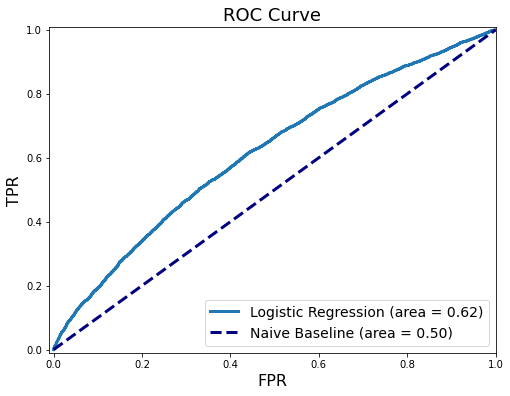

In [153]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

**Logistic Regression Classification Model for DepDelay15**

In [154]:
#y_test = test['DepDel15']
y_prob = logmodeldepdelay15.predict(X_test)
y_prob

0        0.164613
1        0.292399
2        0.220759
3        0.238978
4        0.096118
           ...   
22080    0.135779
22081    0.138693
22082    0.162296
22083    0.228314
22084    0.104444
Length: 22085, dtype: float64

In [155]:
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)
y_pred

0        0
1        0
2        0
3        0
4        0
        ..
22080    0
22081    0
22082    0
22083    0
22084    0
Length: 22085, dtype: int64

In [156]:
cm = confusion_matrix(y_test_delay15, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[18233     0]
 [ 3852     0]]


In [157]:
# Accuracy
print('ACC:', (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel()))  # T/total = (TP+TN)/total)

ACC: 0.8255829748698211


In [158]:
tpr = cm.ravel()[3] / (cm.ravel()[2] + cm.ravel()[3])
fpr = cm.ravel()[1] / (cm.ravel()[0] + cm.ravel()[1])
print('TPR:', tpr)
print('FPR:', fpr)

TPR: 0.0
FPR: 0.0


In [166]:
cm = confusion_matrix(y_test_delay15, y_pred)
print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)
print('PRE is: %.4f' % PRE)

Confusion Matrix : 
 [[18233     0]
 [ 3852     0]]
Accuracy is: 0.8256
TPR is: 0.0000
FPR is: 0.0000
PRE is: nan


C:\Users\Vishal Vinjapuri\AppData\Local\Temp\ipykernel_74844\1201991673.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  PRE = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[1])


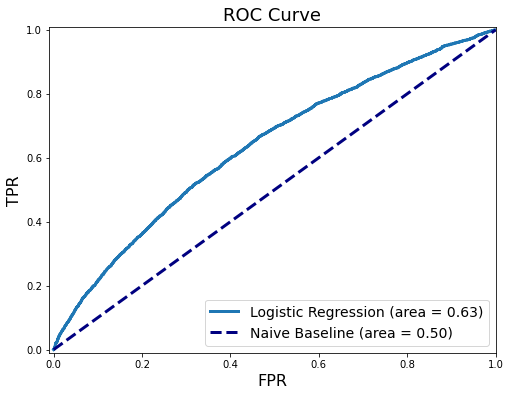

In [159]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

**Bootstrap**

In [185]:
def bootstrap_validation_logreg(X_test, y_test, model, sample=100, random_state=88):

    n_sample = sample
    output_dict = {}

    output_dict['Accuracy'] = []
    output_dict['TPR'] = []
    output_dict['FPR'] = []
    output_dict['PRE'] = []
        
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(X_test.index, len(X_test.index), replace=True)
        
        bs_data = X_test.loc[bs_index]
        bs_label = y_test.loc[bs_index]

        model_pred = model.predict(bs_data)
        bs_pred = pd.Series([1 if x > 0.5 else 0 for x in model_pred], index=model_pred.index)
        cm = confusion_matrix(bs_label, bs_pred)
        tn, fp, fn, tp = cm.ravel()
        output_dict['Accuracy'].append((cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel()))
        output_dict['TPR'].append(tp / (tp + fn))
        output_dict['FPR'].append(fp / (fp + tn))
        if tp+fp > 0:
            output_dict['PRE'].append(tp / (tp + fp))
        else:
            output_dict['PRE'].append(0)
            
    return output_dict


In [186]:
bs_output = bootstrap_validation_logreg(X_test, y_test_class, logmodeldepdelay)

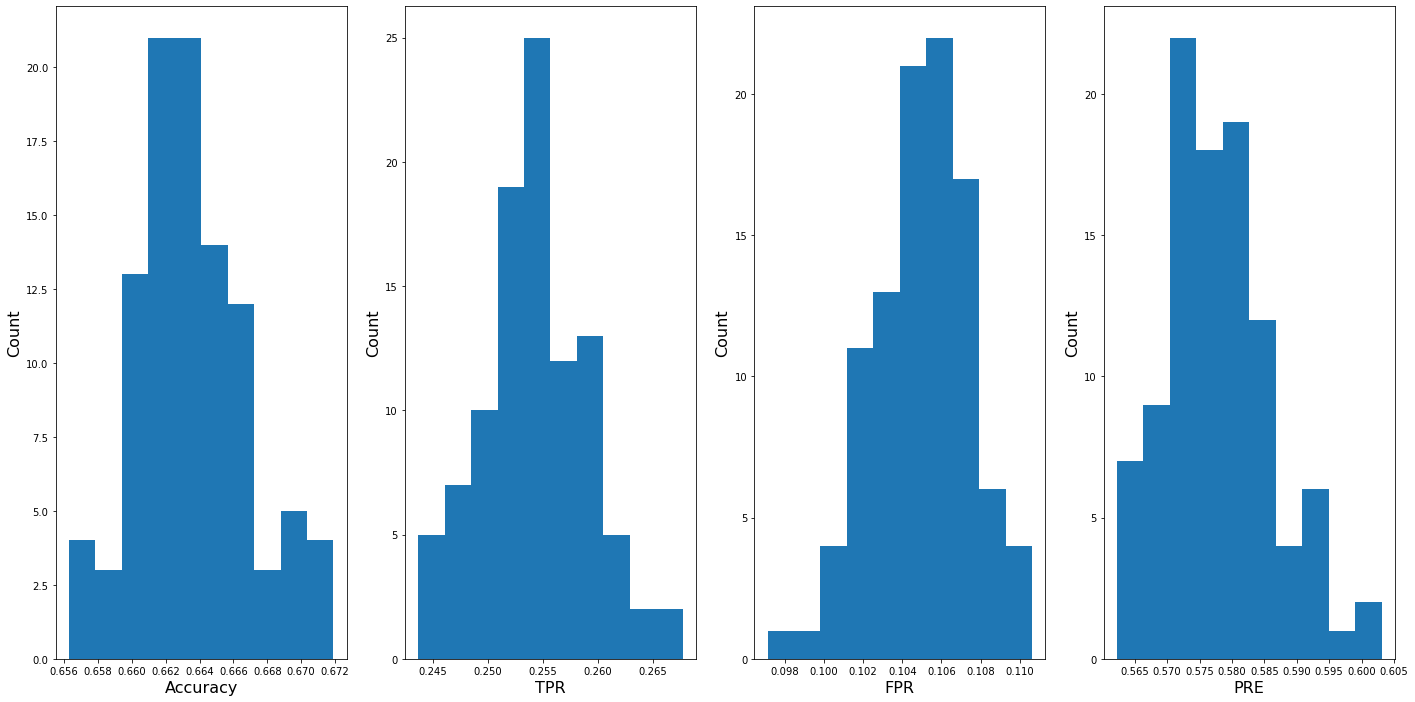

In [187]:
CI_acc = np.quantile(bs_output['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()


In [190]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.657408,0.670669
TPR,0.244758,0.263471
FPR,0.100273,0.109803
PRE,0.563771,0.595610


In [191]:
bs_output2 = bootstrap_validation_logreg(X_test, y_test_delay15, logmodeldepdelay15)

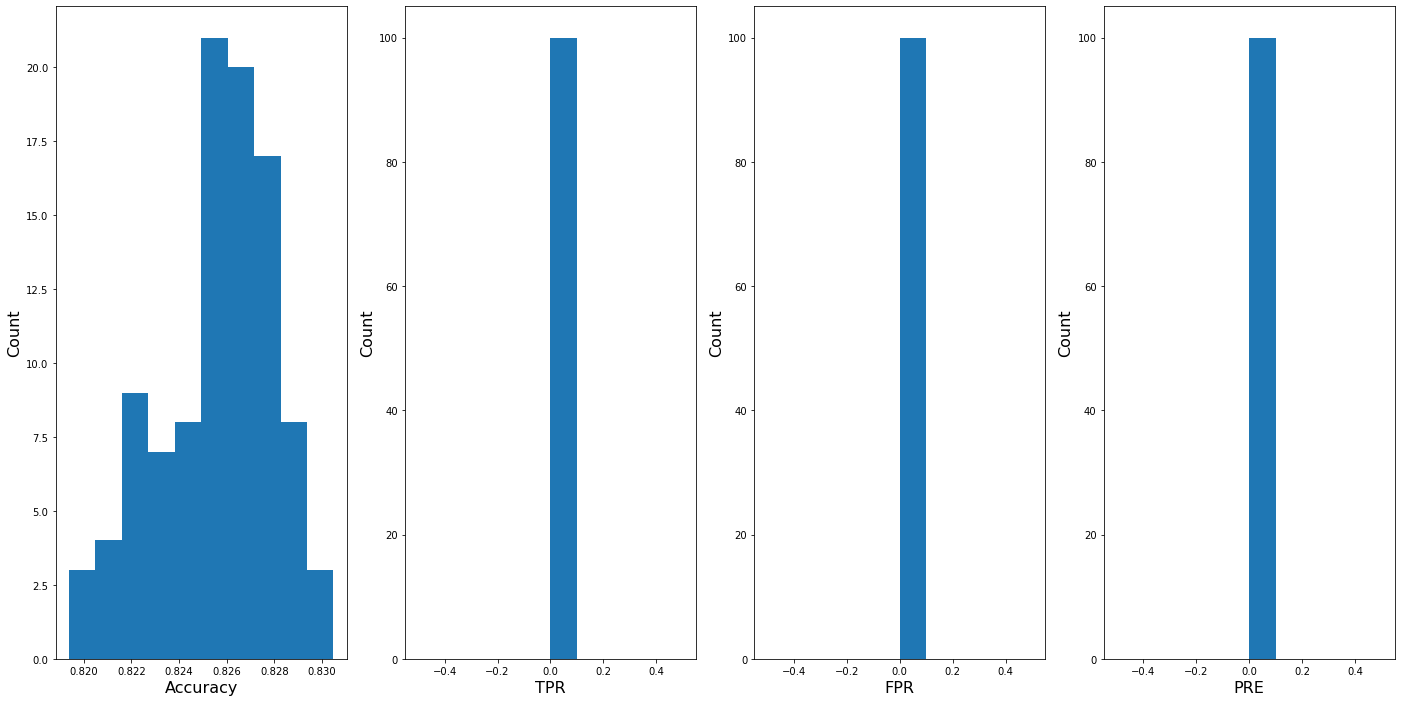

In [192]:
CI_acc = np.quantile(bs_output2['Accuracy'],np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output2['TPR'],np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output2['FPR'],np.array([0.025,0.975]))
CI_PRE = np.quantile(bs_output2['PRE'],np.array([0.025,0.975]))

fig, axs = plt.subplots(ncols=4, figsize=(24,12))
i = 0
for metric, metric_results in bs_output2.items():
    axs[i].hist(metric_results, label = metric)
    axs[i].set_xlabel(metric,fontsize=16)
    axs[i].set_ylabel('Count',fontsize=16)
    i+=1
    
plt.show()

In [193]:
# Let's make a table for this 
bootstrap_data = {'Accuracy':[CI_acc[0],CI_acc[1]],'TPR':[CI_TPR[0],CI_TPR[1]],
                 'FPR':[CI_FPR[0],CI_FPR[1]],'PRE':[CI_PRE[0],CI_PRE[1]]}
bootstrap_table = pd.DataFrame(data = bootstrap_data, index = ['0.025 quantile','0.975 quantile']).transpose()
bootstrap_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
bootstrap_table

,0.025 quantile,0.975 quantile
Accuracy,0.657408,0.670669
TPR,0.244758,0.263471
FPR,0.100273,0.109803
PRE,0.563771,0.595610
